## 청소년 범죄 영향 인자 분석

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [2]:
n_crime = pd.read_csv('../data/nightlife_crime.csv', encoding='euc-kr')
t_crime = pd.read_csv('../data/crime_teenager.csv', encoding='euc-kr')

In [3]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [4]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,0,9,67,37,3,15,300,2411,2465
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [5]:
t_crime.head()

,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


In [6]:
## 컬럼 이름 변경
t_crime.rename(columns={'location': '구별', 'murder': '살인', 'robbery': '강도', 'forcible_rape': '강간', 'thief': '절도', 'violence': '폭행'}, inplace=True)

#### 범죄 발생건 수

In [7]:
print("전체 살인범죄 발생 건수 : %d" %(t_crime['살인']).sum())
print("전체 강도범죄 발생 건수 : %d" %(t_crime['강도']).sum())
print("전체 강간범죄 발생 건수 : %d" %(t_crime['강간']).sum())
print("전체 절도범죄 발생 건수 : %d" %(t_crime['절도']).sum())
print("전체 폭행범죄 발생 건수 : %d" %(t_crime['폭행']).sum())

전체 살인범죄 발생 건수 : 3
전체 강도범죄 발생 건수 : 57
전체 강간범죄 발생 건수 : 243
전체 절도범죄 발생 건수 : 3685
전체 폭행범죄 발생 건수 : 3619


#### 구별 범죄 발생 건 수

In [8]:
def gu_total(x):
    result = x[0]+x[1]+x[2]+x[3]+x[4]
    return result

# 구별 범죄발생건수 합계 열 생성
t_crime['합계'] = t_crime[['살인','강도','강간','절도','폭행']].apply(gu_total,axis=1)

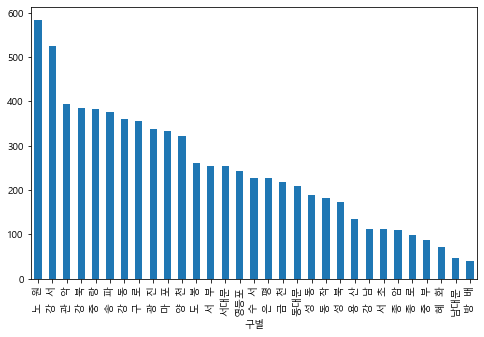

In [9]:
# 구별 총 범죄 발생 건 수 파악

gu_grouped_1 = t_crime.groupby('구별')['합계'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_1.plot(kind='bar')

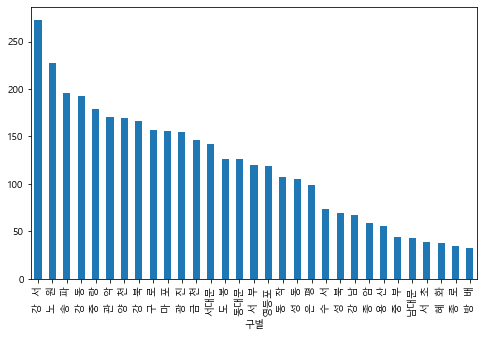

In [10]:
# 구별 '절도' 발생건수 파악
gu_grouped_2 = t_crime.groupby('구별')['절도'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_2.plot(kind='bar')

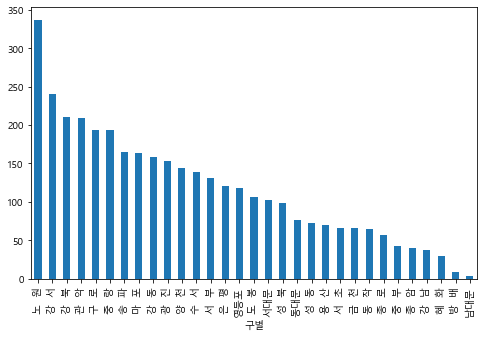

In [11]:
# 구별 '폭행' 발생건수 파악
gu_grouped_2 = t_crime.groupby('구별')['폭행'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_2.plot(kind='bar')

> ```강서```,```노원```이 범죄발생건수에서 상위 2위 를 차지함 

> 범죄 발생건수 상위 2위인 ```강서구```,```노원구```의 유흥업소 현황 파악

In [12]:
노원 = n_crime[n_crime['region'] == "노원"]
강서 = n_crime[n_crime['region'] == "강서"]

In [13]:
노원

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
8,노원,30,57,87,0,6,14,227,337,10,7,197,2193,2723


In [14]:
강서

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207


#### 구별 유흥업소 수 파악

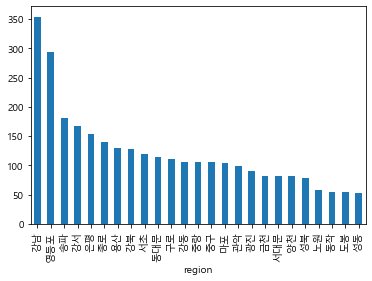

In [15]:
# 구별 단란주점 수 
karaoke_grouped = n_crime.groupby('region')['karaoke'].sum().sort_values(ascending=False).plot(kind='bar')

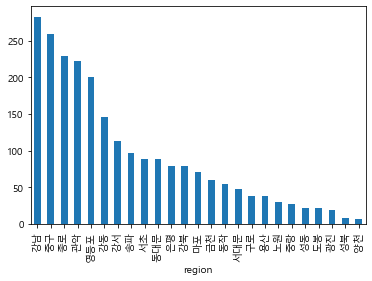

In [16]:
# 구별 유흥주점 수
karaoke_grouped = n_crime.groupby('region')['pub'].sum().sort_values(ascending=False).plot(kind='bar')

> 구별 청소년 범죄발생건수의 경우 ```노원```,```강서구```가 상위 2위 이내였지만 유흥업소 수의 경우 중위권

> 유흥업소 개수의 경우, 구별 인구수,소득수준 등 다양한 요인에 의한것이므로 유흥업소 수와 청소년 범죄발생건수의 비교 힘듦

#### 구별 청소년 범죄 비율 파악

> 구별 청소년 범죄발생 건수의 경우도 구별 인구수등 요인에 의해 절대적 비교 힘드므로 청소년 범죄발생 비율 파악

In [17]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,0,9,67,37,3,15,300,2411,2465
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [24]:
def all_total(x):
    result = x[0]+x[1]+x[2]+x[3]+x[4]
    return result

# t_crime 데이터 이상함. n_crime 데이터만 사용하기위해 청소년 범죄 합계열 새로 생성
# 구별 청소년 범죄발생건수 합계 열 생성
n_crime['Young_Total'] = n_crime[['murder','robbery','forcible_rape','thef','violence']].apply(gu_total,axis=1)

# 구별 전체(청소년+성인) 범죄발생건수 합계 열 생성
n_crime['All_Total'] = n_crime[['murder_tot','robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot']].apply(gu_total,axis=1)

# 구별 청소년 범죄 비율 열 생성

def rate(x):
    result = x[0] / x[1] * 100
    return result
n_crime['rate'] = n_crime[['Young_Total','All_Total']].apply(rate,axis=1)

In [25]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,Young_Total,All_Total,rate
0,강남,283,354,637,0,0,9,67,37,3,15,300,2411,2465,113,5194,2.175587
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712,360,5244,6.864989
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649,385,4257,9.043928
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207,525,5585,9.400179
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298,395,6345,6.225374


In [134]:
n_crime = n_crime.drop('percent',axis=1)

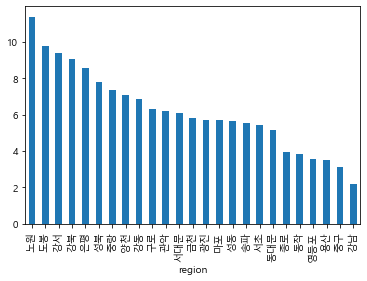

In [19]:
n_crime.groupby('region')['rate'].sum().sort_values(ascending=False).plot(kind='bar')

In [26]:
n_crime[['pub','karaoke','tot_nightlife']].corrwith(n_crime['rate'])

pub             -0.527324
karaoke         -0.437211
tot_nightlife   -0.535491
dtype: float64